## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math
from datetime import datetime
from datetime import timedelta

## Preprocessing

In [51]:
data=pd.read_csv('dataset_finale.csv').iloc[:,1:]

In [38]:
data

,titolo,durata,views,n_comments,n_like,genere,subscribers,publ,max_quality,timedelta,score,class
0,Kinect Sports - Tennis da tavolo Gameplay - Ev...,340,13328,12,11,Gaming,110000,2010-11-11,4,0.297813,0.218197,2
1,Pro Skaters at Morrison Hill,210,5664,13,46,Sports,317,2009-07-20,4,0.219043,0.167310,1
2,Yiruma-Shining Smile,205,11269,69,46,Music,431,2007-11-03,4,0.116264,0.093695,1
3,Guitarras de America (Portafolio),294,3823,6,7,Music,435,2009-07-15,3,0.218221,0.137812,1
4,Review of Microsoft Band as a fitness watch,216,5464,4,32,Science & Technology,20200,2014-11-06,6,0.537247,0.397565,2
...,...,...,...,...,...,...,...,...,...,...,...,...
13369,compostage de fumier avec xerion 2500,440,4133,0,4,People & Blogs,0,2012-07-20,5,0.384291,0.263145,2
13370,Lançamento da embarcação Siem Giant *********...,91,3772,0,14,People & Blogs,30,2013-09-06,4,0.453902,0.342318,2
13371,Anti-Eyebrow Surface Piercing,155,18061,6,18,Howto & Style,20,2009-09-06,3,0.207652,0.182396,1
13372,Carvin DC727 Review,195,1549,11,10,Gaming,193,2011-12-31,4,0.350244,0.235184,2


In [27]:
data.columns

Index(['Unnamed: 0', 'titolo', 'durata', 'views', 'n_comments', 'n_like',
       'genere', 'subscribers', 'publ', 'max_quality', 'timedelta', 'score'],
      dtype='object')

In [14]:
data.columns=['titolo', 'durata', 'views', 'n_comments', 'n_like', 'genere',
       'subscribers', 'FF', 'paid', 'publ', 'max_quality']

In [15]:
#cast dtypes for columns and replace everything with np.nan when value is missing
data['views']=data['views'].replace(" NA", np.nan).astype('Int64')
data['durata']=data['durata'].replace(" NA", np.nan).astype('Int64')
data['FF']=data['FF'].replace(" NA", np.nan).astype('bool')
data['paid']=data['paid'].replace(" NA", np.nan).astype('bool')
data['publ']=data['publ'].replace(" NA", np.nan).astype('str')
data['max_quality']=data['max_quality'].replace(" None", np.nan).astype('Int64')
data['genere']=data['genere'].replace(" NA", np.nan)

TypeError: cannot safely cast non-equivalent float64 to int64

In [16]:
data.dtypes

titolo          object
durata           Int64
views            Int64
n_comments       int64
n_like           int64
genere          object
subscribers      int64
FF                bool
paid              bool
publ            object
max_quality    float64
dtype: object

In [75]:
# tutti i paid e gli ff sono true-> no info -> butto tutto
print(data['paid'].sum()==data['paid'].sum()==len(data))
data=data.drop(['FF','paid'], axis=1)

True


In [76]:
#find rows with all missing values
selected_rows = data[data[['titolo', 'durata', 'views', 'genere', 'max_quality']].isna().all(axis=1)]
data=data.drop(selected_rows.index)

In [77]:
#no double rows
data.duplicated().sum()

0

In [95]:
#non ci sono 1, mettere 1 al posto di nan non cambia lo score
data['max_quality'] = data['max_quality'].fillna(0)
#handling na in score given by missing #views
data['views'][data['views'].isna()]=0
data['likes'][data['likes'].isna()]=0
#convert to datetime
data['publ'] = pd.to_datetime(data['publ'], format=' %Y-%m-%d')
#add timedelta
data['timedelta']=  (data['publ']- data['publ'].min())/(datetime(2022,7,13) - data['publ'].min()) #data della presa dati

In [103]:
data['score'] = data['timedelta'] * (np.log(data['n_like']+1) + np.log(data['views']+1))

In [106]:
#normalize score - gesu cristo trova i nan anche se non ci sono
m=data['score'].min(skipna=True)
M=data.score.max()
data['score'] = (data['score']-m)/(M-m)

<AxesSubplot:>

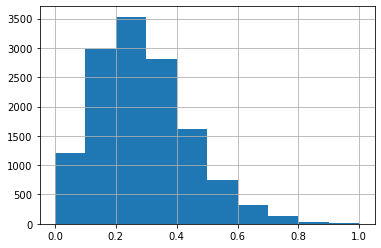

In [39]:
data['score'].hist()

In [56]:
bins=[0,.2,.4,.6]
data['class']=np.digitize(data['score'],bins)-1

In [57]:
data['class'].value_counts()

1    6349
0    4183
2    2359
3     483
Name: class, dtype: int64

In [58]:
data.to_csv('dataset_esteso.csv')  

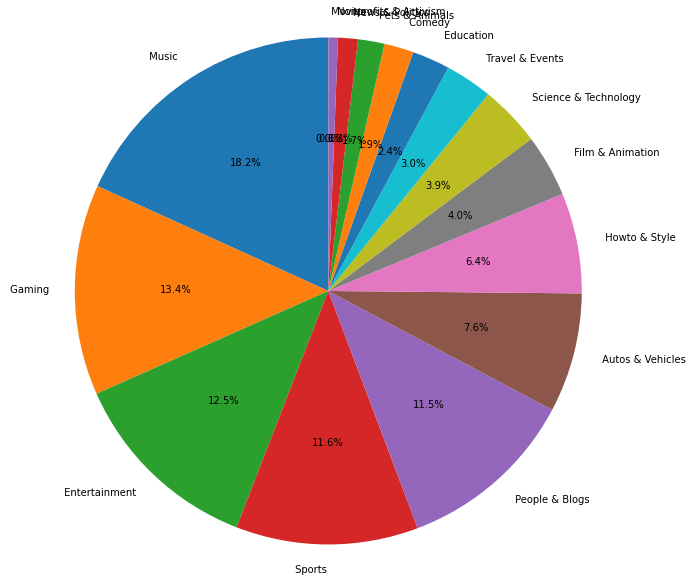

In [59]:
# Pie chart for genres
labels = data['genere'].value_counts().index
sizes = data['genere'].value_counts()/len(data)

fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',startangle=90)
ax1.axis('equal') 

plt.show()

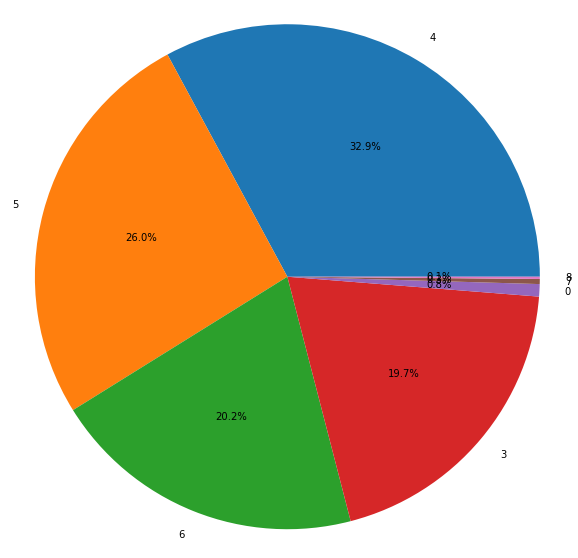

In [68]:
# Pie chart for max_quality
labels = data['max_quality'].value_counts().index
sizes = data['max_quality'].value_counts()/len(data)

fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal') 

plt.show()

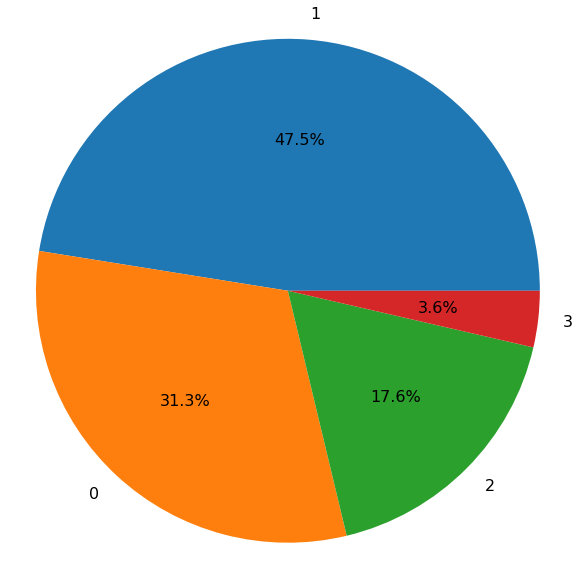

In [70]:
# Pie chart for max_quality
labels = data['class'].value_counts().index
sizes =  data['class'].value_counts()/len(data)

fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',textprops={'fontsize': 16})
ax1.axis('equal') 

plt.savefig('classes_pie.pdf')
plt.show()


array([[<AxesSubplot:title={'center':'durata'}>,
        <AxesSubplot:title={'center':'views'}>,
        <AxesSubplot:title={'center':'n_comments'}>],
       [<AxesSubplot:title={'center':'n_like'}>,
        <AxesSubplot:title={'center':'subscribers'}>,
        <AxesSubplot:title={'center':'max_quality'}>],
       [<AxesSubplot:title={'center':'timedelta'}>,
        <AxesSubplot:title={'center':'score'}>,
        <AxesSubplot:title={'center':'class'}>]], dtype=object)

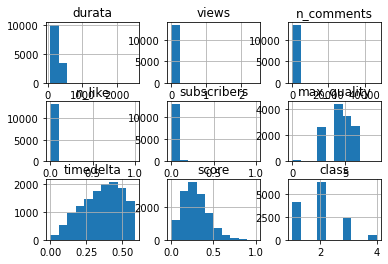

In [44]:
data.hist()